In [1]:
import pandas as pd
import numpy as np
import os
import csv
import gzip
import sys
import datetime
import ast
import matplotlib.pyplot as plt

In [3]:
df_raw = pd.read_csv('../data/raw_survey/RAISE_base_survey_Jan_2024.csv',skiprows=[1,2])

In [4]:
print ('total survey:', len(df_raw)) ##

total survey: 2019


In [55]:
df_raw.head()

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,...,Q10.11_10_TEXT,Q10.12,Q76_4,Q76_5,Q76_6,Q76_7,Q76_8,Q76_9,Q76_10,aid
0,11/22/2022 8:43,11/22/2022 8:50,IP Address,100,378,True,11/22/2022 8:50,R_3CKphd7v4L4nZVw,NaN,NaN,...,NaN,10032 Washington Heights (Manhattan),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/28/2023 22:53,2/28/2023 23:01,IP Address,100,460,True,2/28/2023 23:01,R_zczgBPG9N3bxntn,NaN,NaN,...,NaN,10032 Washington Heights (Manhattan),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/28/2023 8:33,2/28/2023 8:33,IP Address,26,32,False,03/07/2023 08:33,R_UY340I2clf19bK9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/28/2023 9:46,3/28/2023 10:09,IP Address,100,1368,True,3/28/2023 10:09,R_26a3XAqQyCoTWSv,NaN,NaN,...,NaN,10032 Washington Heights (Manhattan),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/29/2023 17:12,6/30/2023 19:04,IP Address,100,93110,True,6/30/2023 19:04,R_25ylc9Zk4J7fjQB,NaN,NaN,...,NaN,10009 Union Square - Lower East Side (Manhattan),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
print('the number of people has not finished', np.sum(df_raw['Finished']!=True))
print('the number of peope has not passed', np.sum(df_raw['Q4.1'] != 'PASS'))

the number of people has not finished 200
the number of peope has not passed 422


In [57]:
np.sum(df_raw['aid'].isna())

41

In [58]:
len(set(df_raw['aid'].values))

1946

In [59]:
from collections import Counter
counting = Counter(df_raw['aid'].values)

In [60]:
duplicates = []
for k, c in counting.items():
    if c>1:
        # print(k,c)
        duplicates.append(k)

In [61]:
df_raw[df_raw['aid'].isin(duplicates)]

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,...,Q10.11_10_TEXT,Q10.12,Q76_4,Q76_5,Q76_6,Q76_7,Q76_8,Q76_9,Q76_10,aid
0,11/22/2022 8:43,11/22/2022 8:50,IP Address,100,378,True,11/22/2022 8:50,R_3CKphd7v4L4nZVw,NaN,NaN,...,NaN,10032 Washington Heights (Manhattan),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/28/2023 22:53,2/28/2023 23:01,IP Address,100,460,True,2/28/2023 23:01,R_zczgBPG9N3bxntn,NaN,NaN,...,NaN,10032 Washington Heights (Manhattan),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/28/2023 8:33,2/28/2023 8:33,IP Address,26,32,False,03/07/2023 08:33,R_UY340I2clf19bK9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/28/2023 9:46,3/28/2023 10:09,IP Address,100,1368,True,3/28/2023 10:09,R_26a3XAqQyCoTWSv,NaN,NaN,...,NaN,10032 Washington Heights (Manhattan),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/29/2023 17:12,6/30/2023 19:04,IP Address,100,93110,True,6/30/2023 19:04,R_25ylc9Zk4J7fjQB,NaN,NaN,...,NaN,10009 Union Square - Lower East Side (Manhattan),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,12/31/2023 10:15,12/31/2023 10:16,IP Address,100,69,True,12/31/2023 10:16,R_5I60J5xpCC7g7UC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,12/29/2023 13:24,12/29/2023 13:28,IP Address,46,214,False,01/05/2024 13:28,R_74pXRWt8BnFuedz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,01/06/2024 16:48,01/06/2024 17:08,IP Address,100,1158,True,01/06/2024 17:08,R_74JfUeWc9ADiGaR,NaN,NaN,...,NaN,NaN,Juan Wang,"640 West 170th Street, Apt. 6D",NaN,New York,NY,10032.0,juanxuhome@foxmail.com,NaN
2017,1/14/2024 17:27,1/14/2024 17:37,IP Address,100,561,True,1/14/2024 17:37,R_5lQQNvecWLpoVBe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dwightsimmons2499@gmail.com,NaN


In [8]:
df_valid = df_raw[(df_raw['Finished'] == True) & (df_raw['Q4.1'] == 'PASS')]

In [63]:
len(df_valid)

1438

In [64]:
times_used = df_valid['Duration (in seconds)'].values

(-1.0, 5000.0)

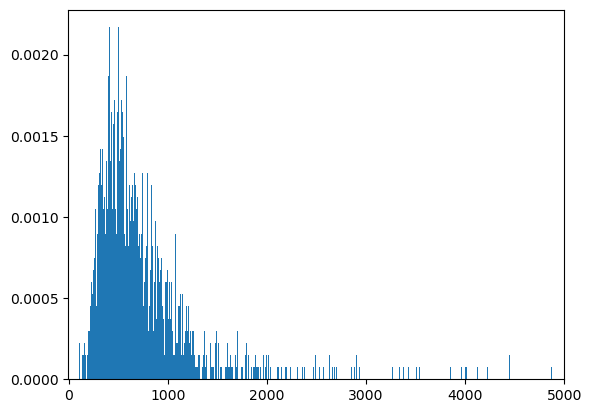

In [65]:
plt.hist(times_used,density=True,bins=10000)
plt.xlim(-1,5000)

In [66]:
np.median(times_used)

611.5

In [67]:
mad = np.median(np.abs(times_used - np.median(times_used)))

In [68]:
np.median(times_used) - 3*mad

-26.0

In [69]:
np.quantile(times_used,0.90)

1294.1999999999998

In [70]:
time_normal = times_used[times_used<1200]

In [71]:
np.median(time_normal)

562.0

In [72]:
np.std(time_normal)

245.54244386643055

In [73]:
from statsmodels import robust
np.median(time_normal) - 3*robust.mad(time_normal)

-194.1271314378571

In [74]:
times_used[times_used<67]

array([], dtype=int64)

In [75]:
robust.mad(time_normal)

252.04237714595234

### clean other question 10 section  

In [9]:
rename_cols = {
    'Q1.2': 'zipcode_long',
    'Q10.1': 'expectation in 1 year',
    'Q10.2': 'home internet',
    'Q10.3': 'financial situation 2020',
    'Q10.4': 'financial situation now',
    'Q10.5': 'financial situation change',
    'Q10.6': 'credit debt situation',
    'Q10.7': 'age',
    'Q10.8': 'gender',
    'Q10.8_4_TEXT': 'gender_des',
    'Q10.9': 'education',
    'Q10.10': 'employment',
    'Q10.11': 'race',
    'Q10.11_10_TEXT': 'race_des',
    'Q10.12': 'destination'
}

In [5]:
%run ../data/mappings/survey_choices_mapping.py

In [10]:
df_person = df_valid[['ResponseId','Q1.2','Q10.1', 'Q10.2',
       'Q10.3', 'Q10.4', 'Q10.5', 'Q10.6', 'Q10.7', 'Q10.8', 'Q10.8_4_TEXT',
       'Q10.9', 'Q10.10', 'Q10.11', 'Q10.11_10_TEXT', 'Q10.12']].copy()
df_person.rename(columns=rename_cols,inplace=True)

In [11]:
df_person['zipcode'] = df_person['zipcode_long'].apply(lambda x: x[:5] if isinstance(x, str) else np.nan)

In [12]:
df_person['expectation_num'] = df_person['expectation in 1 year'].map(expectation_mapping_1)
df_person['internet_num'] = df_person['home internet'].map(expectation_mapping_2)
df_person['financial_2020_num'] = df_person['financial situation 2020'].map(expectation_mapping_3)
df_person['financial_now_num'] = df_person['financial situation now'].map(expectation_mapping_4)
df_person['financial_change_num'] = df_person['financial situation change'].map(expectation_mapping_5)
df_person['credit_debt_num'] = df_person['credit debt situation'].map(expectation_mapping_6)
df_person['age_num'] = 2024 - df_person['age']
df_person['gender_num'] = df_person['gender'].map(expectation_mapping_8)
df_person['education_num'] = df_person['education'].map(expectation_mapping_9)
df_person['employment_num'] = df_person['employment'].map(expectation_mapping_10)
df_person['race_num'] = df_person['race'].map(expectation_mapping_11)

In [13]:
df_person.to_csv('../results/scores/person_info.csv',index=False)

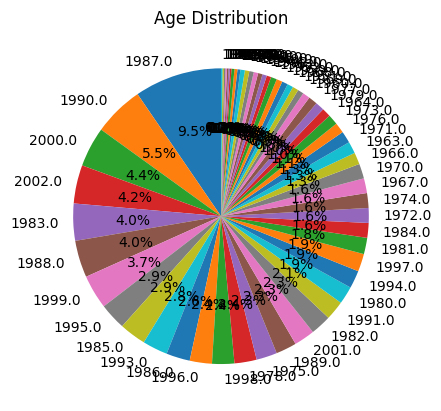

In [69]:
### ages
value_counts = df_valid['Q10.7'].value_counts()

# Plot pie chart
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Age Distribution')
plt.ylabel('')  # Hide the 'Fruits' ylabel
plt.show()

In [24]:
ages = 2023 - df_valid['Q10.7'].values

Text(0.5, 1.0, 'Age Distribution')

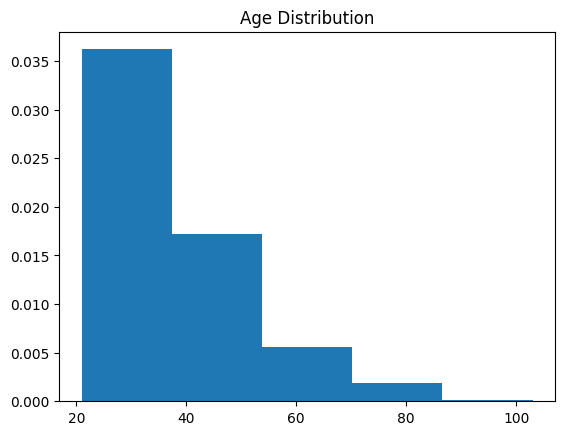

In [25]:
plt.hist(ages,bins=5,density=True)
plt.title('Age Distribution')

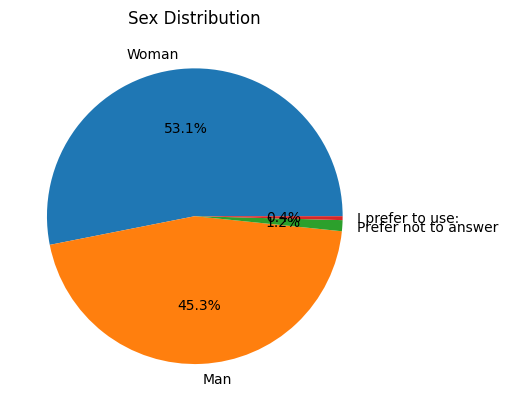

In [37]:
value_counts = df_valid['Q10.8'].value_counts()

# Plot pie chart
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0)

plt.title('Sex Distribution')
plt.ylabel('')  # Hide the 'Fruits' ylabel
plt.show()

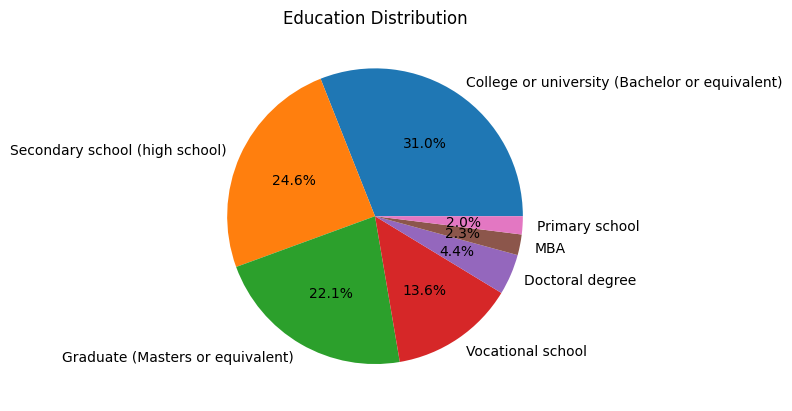

In [29]:
value_counts = df_valid['Q10.9'].value_counts()

# Plot pie chart
value_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0)

plt.title('Education Distribution')
plt.ylabel('')  # Hide the 'Fruits' ylabel
plt.show()

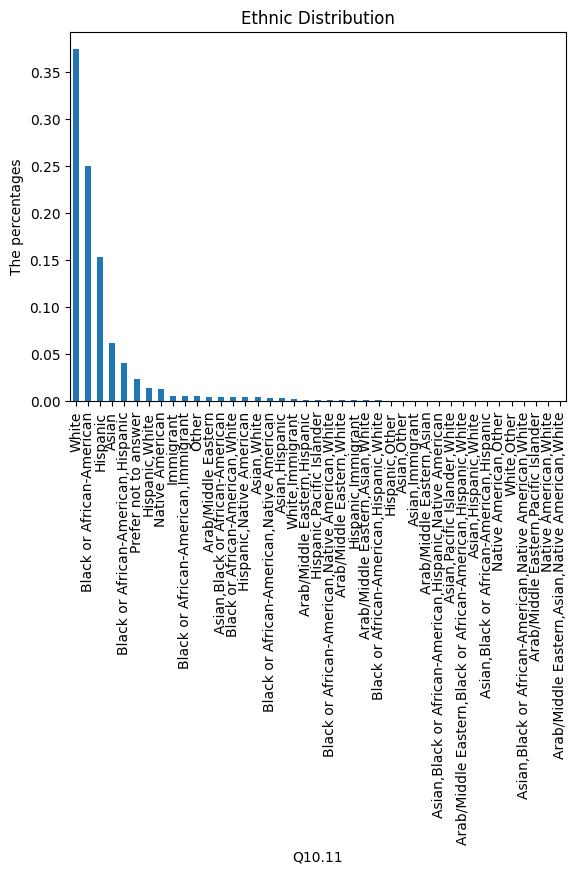

In [38]:
value_counts = df_valid['Q10.11'].value_counts()

# Plot pie chart
total = len(df_valid)
percentages = (value_counts / total) 
percentages.plot(kind='bar')

plt.title('Ethnic Distribution')
plt.ylabel('The percentages') 
plt.show()

In [24]:
df_raw['zip_code'] = df_raw['Q1.2'].apply(lambda x: x[:5] if isinstance(x, str) else np.nan)
df_zipcode = df_raw[~df_raw['zip_code'].isna()][['zip_code']]
df_zipcode.value_counts().to_csv('counts.csv')

In [26]:
df_valid.loc[:, 'zip_code'] = df_valid['Q1.2'].apply(lambda x: x[:5] if isinstance(x, str) else np.nan)
# df_zipcode = df_valid[~df_valid['zip_code'].isna()][['zip_code']]
# df_zipcode.value_counts().to_csv('zipcode_counts_new.csv')
# df_valid.to_csv('valid_survey.csv')

/var/folders/vx/g_l159t12yb63094n730n4pm0000gn/T/ipykernel_45791/3441245573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid.loc[:, 'zip_code'] = df_valid['Q1.2'].apply(lambda x: x[:5] if isinstance(x, str) else np.nan)


In [27]:
df_valid_cleaned = df_valid[df_valid['zip_code'].apply(lambda x: x.isnumeric() if isinstance(x, str) else False)]

# df_valid_cleaned

In [28]:
df_zipcode = df_valid_cleaned[~df_valid_cleaned['zip_code'].isna()][['zip_code','Q1.2']]
df_zipcode.value_counts().to_csv('zipcode_counts_new.csv')

In [30]:
df_zipcode.value_counts()

zip_code  Q1.2                                                  
10025     10025 Upper West Side (Manhattan)                         139
10002     10002 Union Square - Lower East Side (Manhattan)          127
10029     10029 East Harlem (Manhattan)                             120
11234     11234 Canarsie - Flatlands (Brooklyn)                     103
11226     11226 East Flatbush - Flatbush (Brooklyn)                 100
                                                                   ... 
10152     10152 Gramercy Park - Murray Hill (Manhattan)               1
11224     11224 Coney Island - Sheepshead Bay (Brooklyn)              1
10128     10128 Upper East Side (Manhattan)                           1
10115     10115 Central Harlem - Morningside Heights (Manhattan)      1
10112     10112 Chelsea - Clinton (Manhattan)                         1
Name: count, Length: 140, dtype: int64